In [1]:
import numpy as np
import numpy 
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
%matplotlib notebook

In [2]:
train_data = np.load("train_images.npy")
labels = np.load("train_labels.npy")
# labels = labels.astype(int)

### Prepairing Data

#### Creating Vectors

In [3]:
labels = labels.flatten().reshape(labels.shape[0])

In [4]:
train_data = train_data / train_data.max()

In [5]:
x_train, x_test, y_train, y_test = train_test_split(train_data, labels, test_size=0.25, random_state=0)

### Train

In [6]:
def convert_labels(l):
    vector = np.zeros(10)
    vector[l] = 1
    return vector

In [7]:
def softmax(X, b):
    z = X.dot(b)
    z -= np.max(z)
    sm = (np.exp(z).T / np.sum(np.exp(z),axis=1)).T
    return sm

In [8]:
def loss(X, y, b):
    prob = softmax(X, b) 
    loss = (-1 / len(X)) * np.sum(y * np.log(prob))
    return loss

In [9]:
def grad (y, X, b):
    h = softmax(X, b)
    return (-1 / len(X)) * np.dot(X.T,(y - h))

In [10]:
def train(X, y, steps=10, lr=1e-2):
    b = np.zeros([x_train.shape[1],len(np.unique(y))])
    losses = []
    y = np.array([convert_labels(int(a)) for a in y])
    for i in range(steps):        
        gradient = grad(y, X, b)
        b = b - lr * gradient
        l = loss(X, y, b) 
        losses.append(l)
        if i % 200 == 1:
            print("step: {}, loss: {}".format(i, l))
    return b, losses

In [11]:
w, losses = train(x_train, y_train, steps=5000)

step: 1, loss: 2.2811127889218006
step: 201, loss: 1.1893317760947077
step: 401, loss: 0.879276372054964
step: 601, loss: 0.7418995013165212
step: 801, loss: 0.6633976429263801
step: 1001, loss: 0.6118799701808959
step: 1201, loss: 0.5750737947714515
step: 1401, loss: 0.5472320468136407
step: 1601, loss: 0.5252903491802898
step: 1801, loss: 0.5074576874814394
step: 2001, loss: 0.49261324543795604
step: 2201, loss: 0.4800174892193325
step: 2401, loss: 0.46916139935771345
step: 2601, loss: 0.4596823060135528
step: 2801, loss: 0.4513142706002839
step: 3001, loss: 0.44385748364210903
step: 3201, loss: 0.43715865995682884
step: 3401, loss: 0.43109806469095713
step: 3601, loss: 0.42558068303798985
step: 3801, loss: 0.4205300610082427
step: 4001, loss: 0.4158839154521411
step: 4201, loss: 0.41159094451654726
step: 4401, loss: 0.40760847021223867
step: 4601, loss: 0.4039006689503296
step: 4801, loss: 0.4004372247804279


In [12]:
predictions = softmax(x_test, w)

In [13]:
preds = np.argmax(predictions,axis=1)

In [14]:
(preds == y_test).mean() * 100

89.23333333333333

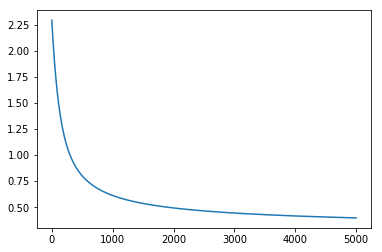

In [15]:
plt.plot(losses)

In [16]:
y_test_converted = np.array([convert_labels(int(a)) for a in y_test])

### Loss on Test Set

In [17]:
loss(x_test, y_test_converted, w)

0.3988018684616271